In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [0]:
# Calling our modules
import Utils
import resnet
import Model_train
import Model_test

In [0]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(32, padding=4),
     
     transforms.ToTensor(),

     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 deer horse  bird  bird


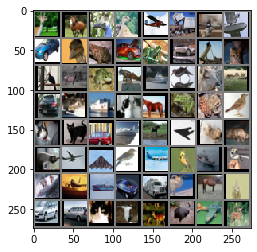

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
!pip install torchsummary
from torchsummary import summary



model = resnet.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model,criterion, device, trainloader, optimizer,scheduler,testloader, epoch):

  Model_train.train(model, criterion,device, trainloader, optimizer, scheduler,epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [0]:
#model =  Model.Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
EPOCHS = 20


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model,criterion, model.device, trainloader, optimizer,scheduler,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.9853461980819702 Batch_id=781 Accuracy=45.10: 100%|██████████| 782/782 [01:45<00:00,  6.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -3.5029, Accuracy: 5075/10000 (50.75%)

EPOCH: 2


Loss=0.9003381133079529 Batch_id=781 Accuracy=61.42: 100%|██████████| 782/782 [01:46<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -4.4529, Accuracy: 6670/10000 (66.70%)

EPOCH: 3


Loss=0.6963202357292175 Batch_id=781 Accuracy=69.80: 100%|██████████| 782/782 [01:45<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -4.9289, Accuracy: 7333/10000 (73.33%)

EPOCH: 4


Loss=0.5665310621261597 Batch_id=781 Accuracy=75.51: 100%|██████████| 782/782 [01:45<00:00,  6.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.0168, Accuracy: 7785/10000 (77.85%)

EPOCH: 5


Loss=0.6518207788467407 Batch_id=781 Accuracy=78.60: 100%|██████████| 782/782 [01:45<00:00,  6.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.7360, Accuracy: 7339/10000 (73.39%)

EPOCH: 6


Loss=0.4172686040401459 Batch_id=781 Accuracy=80.97: 100%|██████████| 782/782 [01:45<00:00,  6.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.1308, Accuracy: 7608/10000 (76.08%)

EPOCH: 7


Loss=0.3315349519252777 Batch_id=781 Accuracy=82.11: 100%|██████████| 782/782 [01:45<00:00,  6.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.2276, Accuracy: 8116/10000 (81.16%)

EPOCH: 8


Loss=0.15426914393901825 Batch_id=781 Accuracy=83.30: 100%|██████████| 782/782 [01:44<00:00,  6.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.1466, Accuracy: 7789/10000 (77.89%)

EPOCH: 9


Loss=0.8715721964836121 Batch_id=781 Accuracy=83.58: 100%|██████████| 782/782 [01:45<00:00,  6.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.6305, Accuracy: 7956/10000 (79.56%)

EPOCH: 10


Loss=0.5674616694450378 Batch_id=781 Accuracy=84.67: 100%|██████████| 782/782 [01:45<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.6739, Accuracy: 8176/10000 (81.76%)

EPOCH: 11


Loss=0.28485924005508423 Batch_id=781 Accuracy=85.51: 100%|██████████| 782/782 [01:45<00:00,  6.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.0086, Accuracy: 8037/10000 (80.37%)

EPOCH: 12


Loss=0.4128221273422241 Batch_id=781 Accuracy=86.04: 100%|██████████| 782/782 [01:45<00:00,  6.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.0492, Accuracy: 8224/10000 (82.24%)

EPOCH: 13


Loss=0.3087034821510315 Batch_id=781 Accuracy=87.17: 100%|██████████| 782/782 [01:45<00:00,  6.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.1099, Accuracy: 8201/10000 (82.01%)

EPOCH: 14


Loss=0.4012507200241089 Batch_id=781 Accuracy=88.15: 100%|██████████| 782/782 [01:45<00:00,  6.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.4527, Accuracy: 8645/10000 (86.45%)

EPOCH: 15


Loss=0.5970734357833862 Batch_id=781 Accuracy=89.31: 100%|██████████| 782/782 [01:44<00:00,  6.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.6656, Accuracy: 8673/10000 (86.73%)

EPOCH: 16


Loss=0.3464234173297882 Batch_id=781 Accuracy=91.03: 100%|██████████| 782/782 [01:44<00:00,  6.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.0560, Accuracy: 8630/10000 (86.30%)

EPOCH: 17


Loss=0.23825900256633759 Batch_id=781 Accuracy=93.04: 100%|██████████| 782/782 [01:45<00:00,  6.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.5156, Accuracy: 8976/10000 (89.76%)

EPOCH: 18


Loss=0.03028339147567749 Batch_id=781 Accuracy=95.01: 100%|██████████| 782/782 [01:46<00:00,  6.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.2095, Accuracy: 9165/10000 (91.65%)

EPOCH: 19


Loss=0.03423622250556946 Batch_id=781 Accuracy=96.64: 100%|██████████| 782/782 [01:46<00:00,  6.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.3395, Accuracy: 9265/10000 (92.65%)

EPOCH: 20


Loss=0.021067649126052856 Batch_id=781 Accuracy=97.03: 100%|██████████| 782/782 [01:45<00:00,  6.79it/s]



Test set: Average loss: -9.3716, Accuracy: 9270/10000 (92.70%)



GroundTruth:    cat truck  frog   dog


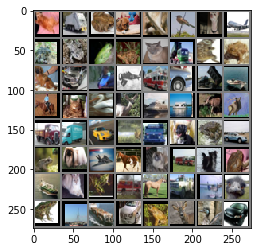

In [0]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(model.device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   dog  ship plane


In [0]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,model.device)

Accuracy of the network on the 10000 test images: 92 %


In [0]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,model.device)    

Accuracy of plane : 92 %
Accuracy of   car : 100 %
Accuracy of  bird : 86 %
Accuracy of   cat : 83 %
Accuracy of  deer : 94 %
Accuracy of   dog : 91 %
Accuracy of  frog : 92 %
Accuracy of horse : 95 %
Accuracy of  ship : 98 %
Accuracy of truck : 93 %
